In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
def print_evaluate(true, predicted):  
    
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def run_all_regressions(X_train, X_test, Y_train, Y_test):
    
    regs = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(),
        'RandomForest': RandomForestRegressor()
    }

    for name, model in regs.items():

        model.fit(X_train, Y_train)
        
        print(f'\n-----{name}------')
        print('[Train] -------------')
        print_evaluate(Y_train, model.predict(X_train))

        print('[Test] --------------')
        print_evaluate(Y_test, model.predict(X_test))

In [3]:
weights = pd.read_csv("data/dataset_fishes.csv")
features = pd.read_csv("features.csv")

In [4]:
weights.index = weights.img
features.index = features.label

weights = weights.drop('img', axis=1)
features = features.drop('label', axis=1)

In [5]:
data = pd.concat([weights, features],
                 axis=1,
                 ignore_index=False, 
                 verify_integrity=True)

data = data.reset_index()

In [6]:
data.head()

,index,specie,weight,width,length,bbox_area,solidity,equivalent_diameter,orientation,convex_area,area,extent,eccentricity,major_axis_length,feret_diameter_max,perimeter,minor_axis_length
0,IMG_20220110_150135.jpg,tambaqui,0.220,9.0,22,2850729,0.930329,1546.333627,-1.562318,2018644,1878003,0.658780,0.921853,2531.940016,2708.014956,6641.348914,981.226132
1,IMG_20220110_150324.jpg,tilápia,0.545,11.0,26,4860075,0.953191,2028.350299,1.541729,3389970,3231289,0.664864,0.911170,3196.000256,3425.843108,8535.391770,1316.847478
2,IMG_20220110_150406.jpg,curimatã,1.025,12.0,31,6563375,0.967800,2352.656763,-1.519653,4491812,4347174,0.662338,0.912033,3722.922879,4046.791569,9803.547325,1526.836252
3,IMG_20220110_150506.jpg,panga,0.740,10.0,37,4113401,0.937156,1862.425280,1.568393,2906938,2724254,0.662287,0.968115,3779.721370,3959.977904,9128.083979,946.850442
4,IMG_20220110_150552.jpg,tilápia,0.475,10.0,24,3796888,0.959150,1825.033572,1.530045,2727375,2615963,0.688976,0.908631,2846.925475,3024.139216,7418.794657,1188.875185


In [7]:
data.weight.sum()

16.625

In [8]:
enc = LabelEncoder()

In [9]:
data.specie = enc.fit_transform(data.specie.values)

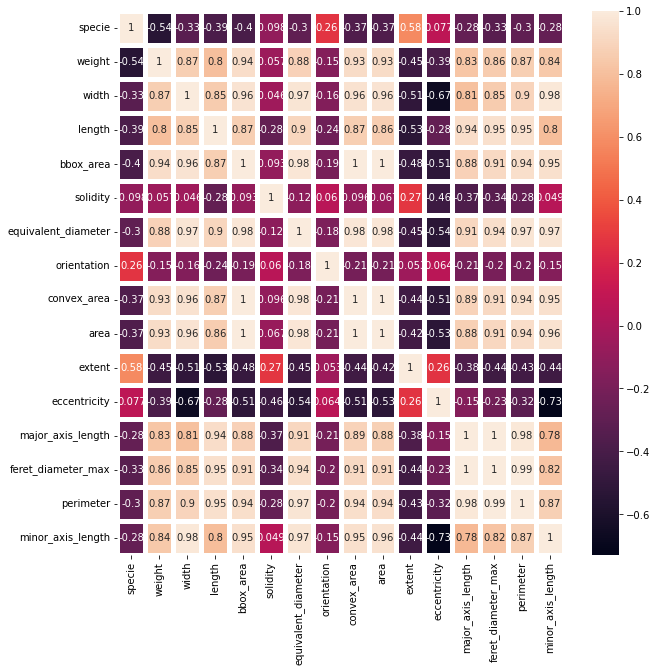

In [10]:
data_corr = data.drop(labels=['index'], axis=1)
corrmat = data_corr.corr()

_, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corrmat, linewidths=5, annot=True);

In [11]:
corrmat[corrmat.weight <= -0.5].weight

specie   -0.541082
Name: weight, dtype: float64

In [12]:
corrmat[corrmat.weight >= 0.5].weight

weight                 1.000000
width                  0.867288
length                 0.802281
bbox_area              0.935793
equivalent_diameter    0.884684
convex_area            0.928405
area                   0.928287
major_axis_length      0.827699
feret_diameter_max     0.858091
perimeter              0.867234
minor_axis_length      0.844089
Name: weight, dtype: float64

In [13]:
features_names = list(dict(corrmat[corrmat.weight >= 0.5].weight).keys())

features_names.append('specie')

In [14]:
data

,index,specie,weight,width,length,bbox_area,solidity,equivalent_diameter,orientation,convex_area,area,extent,eccentricity,major_axis_length,feret_diameter_max,perimeter,minor_axis_length
0,IMG_20220110_150135.jpg,3,0.220,9.0,22,2850729,0.930329,1546.333627,-1.562318,2018644,1878003,0.658780,0.921853,2531.940016,2708.014956,6641.348914,981.226132
1,IMG_20220110_150324.jpg,4,0.545,11.0,26,4860075,0.953191,2028.350299,1.541729,3389970,3231289,0.664864,0.911170,3196.000256,3425.843108,8535.391770,1316.847478
2,IMG_20220110_150406.jpg,0,1.025,12.0,31,6563375,0.967800,2352.656763,-1.519653,4491812,4347174,0.662338,0.912033,3722.922879,4046.791569,9803.547325,1526.836252
3,IMG_20220110_150506.jpg,2,0.740,10.0,37,4113401,0.937156,1862.425280,1.568393,2906938,2724254,0.662287,0.968115,3779.721370,3959.977904,9128.083979,946.850442
4,IMG_20220110_150552.jpg,4,0.475,10.0,24,3796888,0.959150,1825.033572,1.530045,2727375,2615963,0.688976,0.908631,2846.925475,3024.139216,7418.794657,1188.875185
5,IMG_20220110_150640.jpg,5,0.120,4.0,8,1170324,0.942181,1048.896871,1.529494,917109,864083,0.738328,0.977688,2306.167462,2245.481908,5096.826694,484.433964
6,IMG_20220110_150712.jpg,1,0.050,4.0,11,643857,0.967818,749.144347,1.523445,455436,440779,0.684591,0.943098,1309.058451,1367.422758,3196.483548,435.281349
7,IMG_20220110_150758.jpg,5,0.095,3.0,7,927536,0.950450,933.347612,1.547423,719859,684190,0.737643,0.976585,2040.027576,2000.936031,4535.897762,438.875300
8,IMG_20220110_150842.jpg,4,0.440,10.0,23,3750310,0.958539,1855.583431,-1.501295,2821248,2704275,0.721080,0.892697,2783.322368,2972.623420,7430.860674,1254.327425
9,IMG_20220110_150937.jpg,4,0.455,10.0,23,3587128,0.965596,1801.975249,-1.565591,2641144,2550278,0.710953,0.893269,2705.872724,2873.228150,7126.299274,1216.352419


In [15]:
X = data[features_names].drop(labels=['weight'], axis=1)
y = data.weight
l = data['index']

In [16]:
X.head()

,width,length,bbox_area,equivalent_diameter,convex_area,area,major_axis_length,feret_diameter_max,perimeter,minor_axis_length,specie
0,9.0,22,2850729,1546.333627,2018644,1878003,2531.940016,2708.014956,6641.348914,981.226132,3
1,11.0,26,4860075,2028.350299,3389970,3231289,3196.000256,3425.843108,8535.391770,1316.847478,4
2,12.0,31,6563375,2352.656763,4491812,4347174,3722.922879,4046.791569,9803.547325,1526.836252,0
3,10.0,37,4113401,1862.425280,2906938,2724254,3779.721370,3959.977904,9128.083979,946.850442,2
4,10.0,24,3796888,1825.033572,2727375,2615963,2846.925475,3024.139216,7418.794657,1188.875185,4


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [18]:
scaler = StandardScaler()

run_all_regressions(scaler.fit_transform(X_train), 
                    scaler.transform(X_test),
                    y_train,
                    y_test)


-----LinearRegression------
[Train] -------------
MAE: 0.06769163169324617
MSE: 0.01135869673280114
RMSE: 0.10657718673713029
R2 Square 0.9433929281728672
[Test] --------------
MAE: 0.13723201220175751
MSE: 0.03130685112631843
RMSE: 0.17693742149787994
R2 Square 0.7448403301888797

-----Ridge------
[Train] -------------
MAE: 0.08629002262107416
MSE: 0.01618747698780209
RMSE: 0.1272300160646146
R2 Square 0.9193282738236643
[Test] --------------
MAE: 0.09800843115620794
MSE: 0.014561568967992702
RMSE: 0.12067132620466513
R2 Square 0.8813191044090225

-----RandomForest------
[Train] -------------
MAE: 0.040219047619047696
MSE: 0.005536964761904779
RMSE: 0.07441078390868341
R2 Square 0.9724060453981191
[Test] --------------
MAE: 0.06544166666666616
MSE: 0.010711922083333278
RMSE: 0.10349841584939007
R2 Square 0.912694812685009


In [19]:
def run_model(X_train, X_test, Y_train, Y_test, model = RandomForestRegressor()):
    model.fit(X_train, Y_train)
    return model.predict(X_test)

In [20]:
run_model(scaler.fit_transform(X_train), 
          scaler.transform(X_test),
          y_train,
          y_test), y_test

(array([1.07175, 0.46735, 1.38235, 0.71475, 0.1102 , 0.4231 ]),
 array([1.025, 0.5  , 1.135, 0.645, 0.12 , 0.41 ]))

In [21]:
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=2, scoring='r2')

In [22]:
scores

array([0.835367 , 0.6174219])

In [23]:
np.mean(scores)

0.7263944517244043